In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch

Exercise 4.1

Trials: 137125 Tmin: 1.7366473503343909


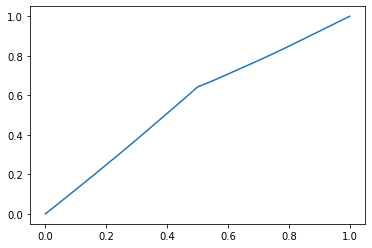

In [48]:
C = 1
seed = 42
np.random.seed(seed)

def refr(x, y): # return the refractive index at (x, y)
    return np.where(x <= .5, 1, 1.5)
    

def transit(y):
    dy = y[1:] - y[:-1]
    xx = .5*(x[1:] + x[:-1])
    yy = .5*(y[1:] + y[:-1])
    return np.sum(refr(xx, yy) * np.sqrt(dx**2 + dy**2)) / C #Doesn't consider the last element

xa = 0
xb = 1
ya = 0
yb = 1

N = 21
x = np.linspace(xa, xb, N+1)
dx = x[1:] - x[:-1]
# y = np.linspace(xa, xb, N+1)
y = np.zeros((N+1))
y[0] = ya
y[N] = yb
y[1:N] = np.random.uniform(0, 1, N-1)

deltay = .1
noreduce = 0
tcurrent = transit(y)
trials = 0
maxsuccess = 1000
docheck = False

while True:
    trials += 1
    i = np.random.randint(1, N)
    y0 = y[i]
    y[i] += np.random.uniform(-deltay, deltay)
    t = transit(y)

    if t < tcurrent: 
        noreduce = 0
        tcurrent = t
    else:
        y[i] = y0 #Keep the original y
        noreduce += 1
                
    if noreduce >= maxsuccess:
        good = True
        
        if docheck:
            for j in range(1, N):
                y0 = y[j]
                delta = np.random.uniform(-deltay, deltay)

                y[j] = y0 + delta
                t = transit(y)

                if t < tcurrent:
                    print('Still can be reduced')
                    noreduce = 0
                    tcurrent = t
                    good = False
                    break

                y[j] = y0 - delta
                t = transit(y) 

                if t < tcurrent:
                    print('Still can be reduced')
                    noreduce = 0
                    tcurrent = t
                    good = False
                    break

                y[j] = y0
        if good:   
            break #After 1000 attempts to reduce t have failed
    
print('Trials:', trials, 'Tmin:', tcurrent)   
plt.figure(figsize = (10,10))
plt.plot(x,y)
plt.show()

Exercise 4.2-4.3

In [4]:
#Calculate 2-D potential between source charge at xq, yq between the other charges
def getPotentialBetween(x, y, q, xq, yq): 
    #get's dr between the source charge and all other charges (includes source charge)
    dr = np.sqrt((x-xq)**2+(y-yq)**2)
    
    #Gets phi by taking dr and removing the dr = 0 (which is from source charge to source charge)
    phi = -K*q[dr>0]*np.log(dr[dr>0])

    return np.sum(phi)

#Calculates the 2-D Efield at the location of the source charge at xq, yq from the other charges
def getEfieldatCharge(x, y, q, xq, yq):
    #get's dr between the source charge and all other charges (includes source charge) and rx,ry components
    dr2 = (x-xq)**2+(y-yq)**2
    rx = (x-xq)
    ry = (y-yq)
    
    #Gets E by taking dr and removing the dr = 0 (which is from source charge to source charge)
    #Since in 2-D; V = -kqln(r)  ==>  E = kq/|r| rhat ==>  E = kqr/|r|^2
    Ex = np.sum(K*q[dr2>0] * rx[dr2>0] /(dr2[dr2>0]))
    Ey = np.sum(K*q[dr2>0] * ry[dr2>0] /(dr2[dr2>0]))
    
    Emag = np.sqrt(Ex**2 + Ey**2)

    return Ex, Ey

Exercise 4.2

In [53]:
#Physical Constants
K = 9.0e9

#Accept-Reject Uniform Points in Circle
R = 1
N = 1000
xbox = np.random.uniform(-R, R, N)
ybox = np.random.uniform(-R, R, N)

x = xbox[(xbox**2 + ybox**2) < 1]
y = ybox[(xbox**2 + ybox**2) < 1]
q = np.ones(x.size) * 1e-6
numcharges = q.size
#Done Initializing Charges

#Define Constants
deltarange = .01
numsuccess = 0
maxsuccess = 1000

#Start Loop
while True:
    
    #Get charge (index number) and deltas for x and y
    charge = np.random.randint(0, numcharges) #Index for charge, not numcharge because random is exclusive
    xdelta = np.random.uniform(-deltarange, deltarange)
    ydelta = np.random.uniform(-deltarange, deltarange)
    
    potold = getPotentialBetween(x, y, q, x[charge], y[charge]) 

    #Store original x,y values and then update
    x0 = x[charge]
    y0 = y[charge]
    x[charge] += xdelta
    y[charge] += ydelta
    
    #If charges are moved beyond a circle this places them back
    if (x[charge]**2 + y[charge]**2) > 1:
        rmag = np.sqrt(x[charge]**2 + y[charge]**2)
        x[charge] = x[charge]/rmag  #If R != 1 then need to reconfigure this
        y[charge] = y[charge]/rmag
    
    potnew = getPotentialBetween(x, y, q, x[charge], y[charge])
    if potnew < potold: #The shift decreased the potential
        numsuccess = 0
    else:
        numsuccess += 1
        x[charge] = x0
        y[charge] = y0      
        
    #If failed to decrease the potential after 1000 success tries
    if numsuccess >= maxsuccess:
        break #Simulation is done
    
plt.figure(figsize = (10,10))
plt.plot(x,y, 'k.')
plt.show()

KeyboardInterrupt: 

Exercise 4.3

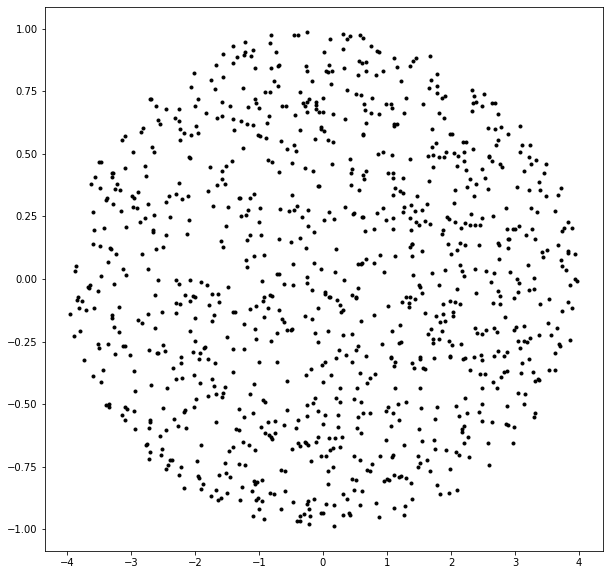

KeyboardInterrupt: 

In [56]:
#Physical Constants
K = 9.0e9

#Accept-Reject Uniform Points in Circle
R = 4
a = 4
b = 1
N = 1000
x = np.array([])
y = np.array([])

def getepsilon(x,y,a,b):
    return (x/a)**2 + (y/b)**2

while True:
    n = N - x.size
    
    xbox = np.random.uniform(-R, R, n)
    ybox = np.random.uniform(-R, R, n)
    
    x = np.concatenate((x, xbox[((xbox/a)**2 + (ybox/b)**2) < 1]), axis = 0)
    y = np.concatenate((y, ybox[((xbox/a)**2 + (ybox/b)**2) < 1]), axis = 0)
    
    if n == 0:
        break
        
plt.figure(figsize = (10,10))
plt.plot(x,y, 'k.')
plt.show()

q = np.ones(x.size) * 1e-6
numcharges = q.size
#Done Initializing Charges

#Define Constants
deltarange = .1
numsuccess = 0
maxsuccess = 1000

#Start Loop
while True:
    
    #Get charge (index number) and deltas for x and y
    charge = np.random.randint(0, numcharges) #Index for charge, not numcharge because random is exclusive
    delta = np.random.uniform(-deltarange, deltarange)
    
    potold = getPotentialBetween(x, y, q, x[charge], y[charge]) 
    Ex, Ey = getEfieldatCharge(x, y, q, x[charge], y[charge])
    #Store original x,y values and then update
    x0 = x[charge]
    y0 = y[charge]
    x[charge] += delta*Ex
    y[charge] += delta*Ey
    
    #If charges are moved beyond a circle this places them back
    if ((x[charge]/a)**2 + (y[charge]/a)**2) >= 1:
        eps0 = getepsilon(x0, y0, a, b)
        eps1 = getepsilon(x[charge], y[charge], a, b)
        
        xnew = -eps0 * (x[charge] - x0)/(eps1 - eps0) + x0 
        ynew = -eps0 * (y[charge] - y0)/(eps1 - eps0) + y0 
        
        x[charge] = xnew  #If R != 1 then need to reconfigure this
        y[charge] = ynew
    
    potnew = getPotentialBetween(x, y, q, x[charge], y[charge])
    if potnew < potold: #The shift decreased the potential
        numsuccess = 0
    else:
        numsuccess += 1
        x[charge] = x0
        y[charge] = y0      
        
    #If failed to decrease the potential after 1000 success tries
    if numsuccess >= maxsuccess:
        break #Simulation is done
    
plt.figure(figsize = (10,10))
plt.plot(x,y, 'k.')
plt.show()

In [38]:
b = Exercise4_3()
b.step()

In [86]:
R = 1
N = 1000
x = np.array([])
y = np.array([])

while True:
    n = N - x.size
    
    xbox = np.random.uniform(-R, R, n)
    ybox = np.random.uniform(-R, R, n)
    
    x = np.concatenate((x, xbox[(xbox**2 + ybox**2) < 1]), axis = 0)
    y = np.concatenate((y, ybox[(xbox**2 + ybox**2) < 1]), axis = 0)
    
    if n == 0:
        break




In [72]:
y.shape

(800,)

In [10]:
np.ones(3)

array([1., 1., 1.])

In [61]:
a = np.array([1,3,7,10])

In [62]:
a[1:] - a[:-1]

array([2, 4, 3])

In [45]:
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

initial t = 8.450050603130258
tmin = 2.144827673238291 trials = 106187 count = 1000


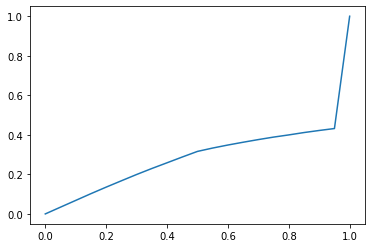

In [92]:
N = 20
seed = 42
C = 1.0
xmin = 0.0
xmax = 1.0

def refr(x, y):
    if x <= 0.5:
        return 1.0
    else:
        return 1.5

def transit(x, y):
    t = 0.0
    for i in range(len(x)-1):
        xx = 0.5*(x[i]+x[i+1])
        yy = 0.5*(y[i]+y[i+1])
        ni = refr(xx, yy)
        dx = x[i+1] - x[i]
        dy = y[i+1] - y[i]
        ds = math.sqrt(dx*dx + dy*dy)
        t += ni*ds/C
    return t

np.random.seed(seed)

# Initialize the path from (0,0) to (1,1).

x = np.linspace(xmin, xmax, N+1)
y = np.linspace(xmin, xmax, N+1)
t = transit(x, y)
print('initial t =', t)
tmin = t

# Loop until tmin doesn't decrease for a specified number of trials.

deltay = 0.1			# 1./N
trials = 0
count = 0
while count < 1000:		# 100*N:

    # Randomly change one point between 1 and N-1 (y[0], y[N] are fixed).

    trials += 1
    i = np.random.randint(1, N-1)

    y0 = y[i]
    y[i] += np.random.uniform(-deltay, deltay)
    t = transit(x, y)

    if t < tmin:		# accept
        count = 0
        tmin = t
    else:				# discard
        y[i] = y0
        count += 1

print('tmin =', tmin, 'trials =', trials, 'count =', count)
plt.plot(x, y)
plt.show()

In [15]:
np.ones(3)

array([1., 1., 1.])

In [21]:
a = np.array([.5, 1])
b = np.array([2.5, 3])
ep0 = (a[0]/2)**2 + (a[1])**2
ep1 = (b[0]/2)**2 + (b[1])**2

In [23]:
r = a + -ep0 * (b-a)/(ep1 - ep0)
r

array([0.27631579, 0.77631579])

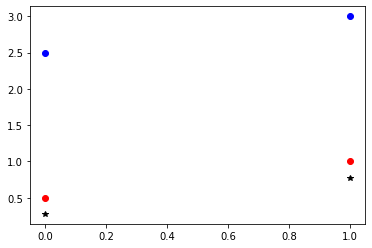

In [24]:
plt.plot(a,'ro')
plt.plot(b,'bo')
plt.plot(r, 'k*')

In [25]:
r

array([0.27631579, 0.77631579])

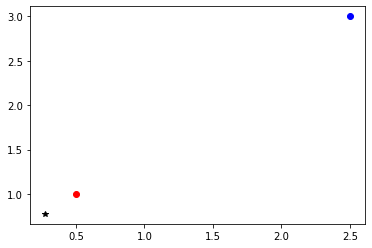

In [28]:
plt.plot(a[0],a[1],'ro')
plt.plot(b[0],b[1],'bo')
plt.plot(r[0],r[1], 'k*')

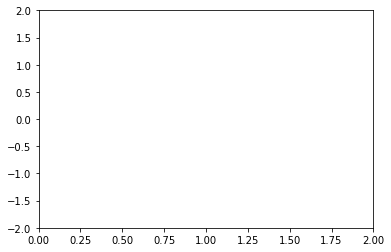

In [42]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

In [41]:
line

In [43]:
line

In [51]:
hi()

(1,)